- Sequential RANSAC / Recursive-RANSAC
- Hough Transform
- Line Segment Detection
- Convolution: file:///Users/kptruong/Downloads/Efficient_line_detection_method_bas.pdf

# Import data

In [1]:
from typing import Union
from datetime import datetime, timedelta
import warnings

import numpy as np
import pandas as pd
from scipy import signal
from scipy.ndimage import gaussian_filter
import sklearn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import torch
import torch.nn.functional as F

from src import helper, dasly

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 103115',
    duration=60
)

Welcome to Dasly!
7 files, from 103014 to 103114


# Heatmap

float
Heatmap with vmin -1.21e+05, vmax 1.21e+05


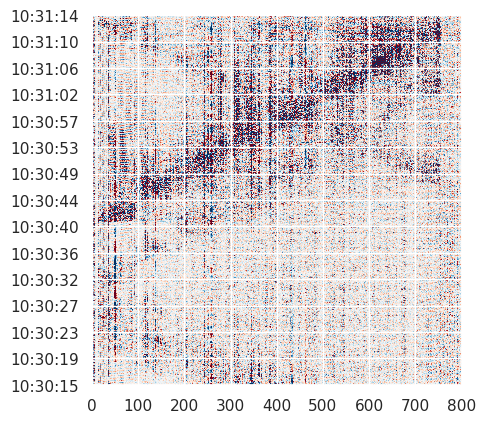

In [3]:
das.heatmap()

float
Heatmap with vmin -704, vmax 704


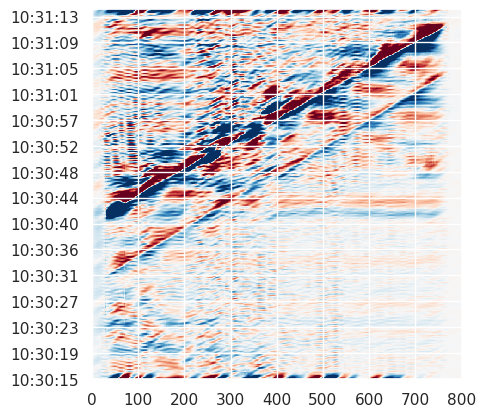

In [4]:
das.reset()
das.sample(100)
das.convolve(90, 95, 10)
das.heatmap()

Threshold 704
binary


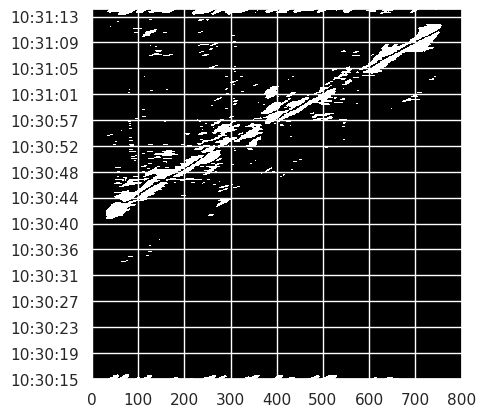

In [5]:
das.reset()
das.sample(100)
das.convolve(90, 95, 10)
das.binary_filter()
das.heatmap()

In [6]:
das.reset()
das.sample(100)
das.convolve(90, 95, 10)
das.binary_filter()
das.detect_events(eps=100, min_samples=100)
das.heatmap()

category
Heatmap with vmin nan, vmax nan


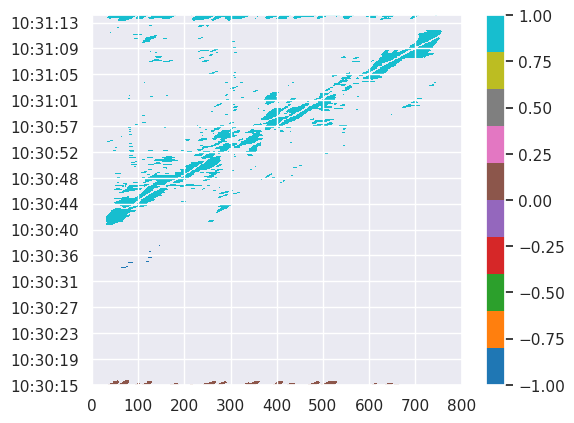

In [7]:
das.heatmap()

# Speed - Angle

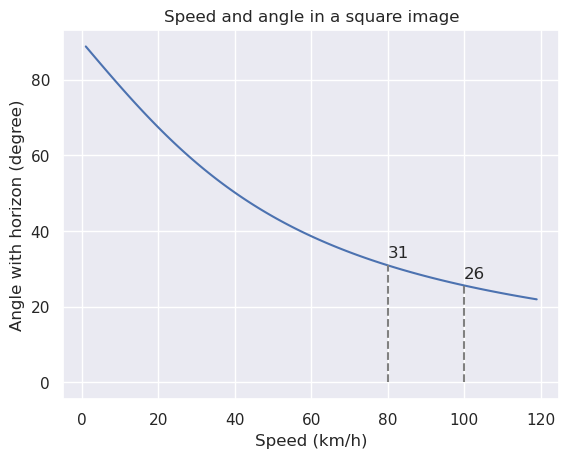

In [8]:
speeds = np.arange(1, 120, 1)
angles = [helper.speed_to_angle(i) for i in speeds]
sns.lineplot(x=speeds, y=angles)
plt.title('Speed and angle in a square image')
plt.xlabel('Speed (km/h)')
plt.ylabel('Angle with horizon (degree)')
plt.vlines(
    x=[80, 100],
    ymin=[0, 0],
    ymax=[helper.speed_to_angle(80), helper.speed_to_angle(100)],
    ls='--',
    color='grey'
)
for i in [80, 100]:
    plt.text(
        x=i,
        y=helper.speed_to_angle(i) + 2,
        s=f'{helper.speed_to_angle(i):.0f}'
    )